# 0.Importations et fusions 

## Importation

### Importation des librairies 

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

from sklearn.metrics import f1_score,recall_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importation des datasets

In [130]:
pd.set_option('display.max_row',100)
pd.set_option('display.max_column',100)

In [131]:
df_cleveland = pd.read_csv('/content/drive/MyDrive/Projet Heart Diseases/Espace individuel/Paul/processed.cleveland.csv',sep=",",header=None)
df_switzerland = pd.read_csv('/content/drive/MyDrive/Projet Heart Diseases/Espace individuel/Paul/processed.switzerland.csv',header=None)
df_va=pd.read_csv("/content/drive/MyDrive/Projet Heart Diseases/Espace individuel/Paul/processed.va.data",header=None)
df_hungarian=pd.read_csv("/content/drive/MyDrive/Projet Heart Diseases/Espace individuel/Paul/reprocessed.hungarian.prn", delimiter=' ',header=None)

## Fusion


In [132]:
list_df=[df_cleveland,df_switzerland,df_va,df_hungarian]
for i in range(len(list_df)):
  list_df[i].columns=["age","sexe","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeack","slope","ca","thal","num"]


df_cleveland=df_cleveland.assign(Location=1)
df_switzerland=df_switzerland.assign(Location=2)
df_va=df_va.assign(Location=3)
df_hungarian=df_hungarian.assign(Location=4)


data=df_cleveland


data=data.append([df_switzerland,df_va,df_hungarian])
data.num=np.where(data.num!=0,1,0)


In [133]:
data

,age,sexe,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeack,slope,ca,thal,num,Location
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,1
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48.0,0.0,2.0,-9,308,0,1,-9,-9,2.0,1,-9,-9,0,4
290,36.0,1.0,2.0,120,166,0,0,180,0,0.0,-9,-9,-9,0,4
291,48.0,1.0,3.0,110,211,0,0,138,0,0.0,-9,-9,6,0,4
292,47.0,0.0,2.0,140,257,0,0,135,0,1.0,1,-9,-9,0,4


In [134]:
data = data.replace("?",np.nan)
data = data.replace("-9",np.nan)
data = data.replace("9",np.nan)
data.fillna(9999, inplace=True)
#data.age=data.age.astype(int)
#data.sexe=data.sexe.astype(int)
#data.cp=data.cp.astype(int)

#data.thalach=data.thalach.astype(int)
#data.exang=data.exang.astype(int)
data.trestbps=data.trestbps.astype(int)
#data.chol=data.chol.astype(int)
#data.fbs=data.fbs.astype(int)
#data.restecg=data.restecg.astype(int)
#data.slope=data.slope.astype(int)
#data.ca=data.ca.astype(float).astype(int)
#data.thal=data.thal.astype(float).astype(int)
#data.oldpeack=data.oldpeack.astype(float).astype(int)


data = data.replace(9999,np.nan)
print(data)




      age  sexe   cp  trestbps   chol  fbs restecg thalach exang oldpeack  \
0    63.0   1.0  1.0     145.0  233.0  1.0     2.0   150.0   0.0      2.3   
1    67.0   1.0  4.0     160.0  286.0  0.0     2.0   108.0   1.0      1.5   
2    67.0   1.0  4.0     120.0  229.0  0.0     2.0   129.0   1.0      2.6   
3    37.0   1.0  3.0     130.0  250.0  0.0     0.0   187.0   0.0      3.5   
4    41.0   0.0  2.0     130.0  204.0  0.0     2.0   172.0   0.0      1.4   
..    ...   ...  ...       ...    ...  ...     ...     ...   ...      ...   
289  48.0   0.0  2.0      -9.0    308    0       1      -9    -9      2.0   
290  36.0   1.0  2.0     120.0    166    0       0     180     0      0.0   
291  48.0   1.0  3.0     110.0    211    0       0     138     0      0.0   
292  47.0   0.0  2.0     140.0    257    0       0     135     0      1.0   
293  53.0   1.0  4.0     130.0    182    0       0     148     0      0.0   

    slope   ca thal  num  Location  
0     3.0  0.0  6.0    0         1  
1

# 1.EDA - Exploratory Data Analysis
## Objectif 

*  Comprendre du mieux possible nos données
*  Développer une première stratégie de modélisation

## Checklist de base
### Analyse de Forme :

*   Variable target : Num result 
*   Lignes et colonnes : 920,29
*   Types de variables : Qualitatives : 3, Quantitatives : 11, catégorielle : 1
*   Analyse des valeurs manquantes : Taux de valeurs manquantes assez faible, 2 groupes de données : age,sexe,cp,num,Location et thalach,exang










### Analyse de Fond :

*   Visualisation de la target : 55% de patients atteints d'une maladie cardiaque, 45% sans maladie : classes assez équilibrées
*   Signification des variables : variable continue :float et int - gaussiène non centrée et binaire, variable qualitative : aucune
*   Relation Variables/Target : 

*   Élément de liste : 











### Analyse de Forme

In [135]:
df=data.copy().reset_index()

In [136]:
df.shape

(920, 16)

In [137]:
df.dtypes

index         int64
age         float64
sexe        float64
cp          float64
trestbps    float64
chol         object
fbs          object
restecg      object
thalach      object
exang        object
oldpeack     object
slope        object
ca           object
thal         object
num           int64
Location      int64
dtype: object

In [138]:
df.dtypes.value_counts()

object     9
float64    4
int64      3
dtype: int64

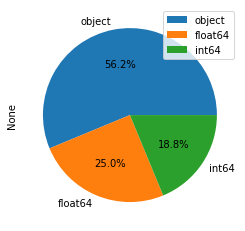

In [139]:
df.dtypes.value_counts().plot.pie(autopct='%1.1f%%')
plt.legend()

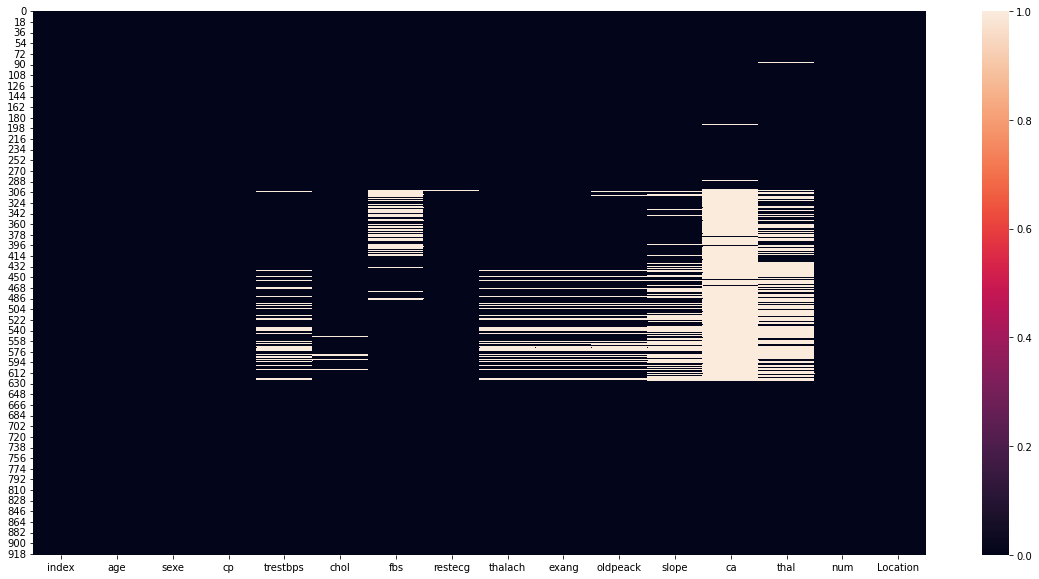

In [140]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna()) #blanc = vide,#noir=plein, lignes: bonnes nouvelles car on va les supprimer avec dropna et il y a surement une relation

In [141]:
(df.isna().sum()/df.shape[0]).sort_values(ascending=True)

index       0.000000
age         0.000000
sexe        0.000000
cp          0.000000
num         0.000000
Location    0.000000
restecg     0.001087
chol        0.007609
thalach     0.058696
exang       0.058696
trestbps    0.063043
oldpeack    0.067391
fbs         0.089130
slope       0.129348
thal        0.239130
ca          0.347826
dtype: float64



*   age,sexe,cp,num,Location : aucune valeurs manquantes
*  thalach,exang : même nombre de valeurs manquantes



### Analyse du Fond

**1. Visualisation de la target**

Visulation initiale - Elimination des colonnes inutiles (>90% de valeurs manquantes):

In [142]:
df=df[df.columns[df.isna().sum()/df.shape[0]<0.9]] #inutile ici

Examen de la colonne target

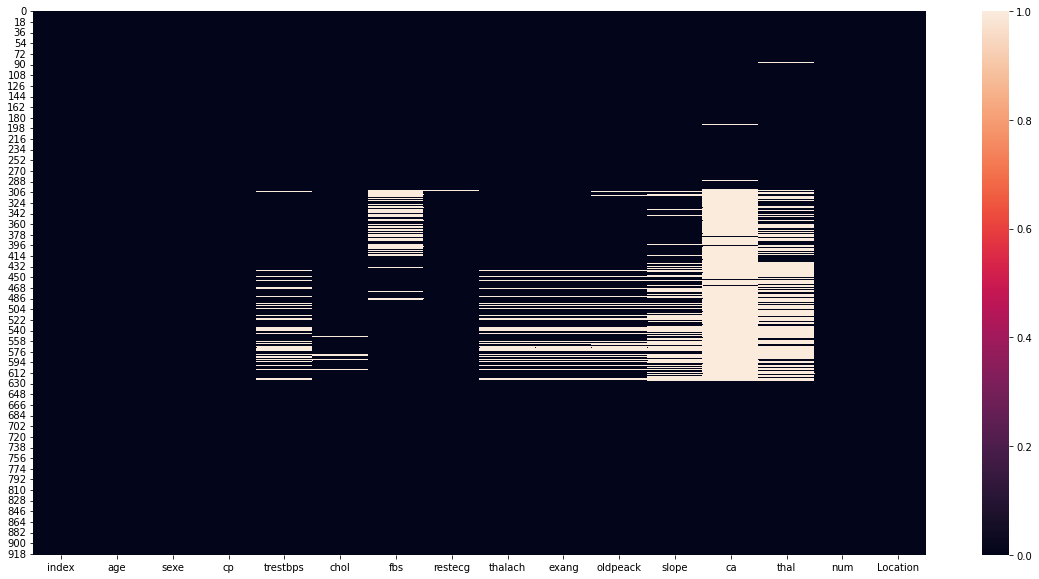

In [143]:
plt.figure(figsize=(20,10))
sns.heatmap(df.isna())

In [144]:
df["num"].value_counts()

1    509
0    411
Name: num, dtype: int64

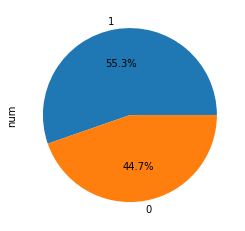

In [145]:
df["num"].value_counts().plot.pie(autopct='%1.1f%%')

Histogrammes des variables continues

**2. Signification des variables**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

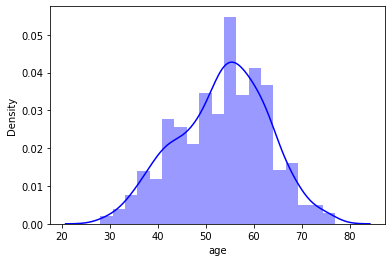

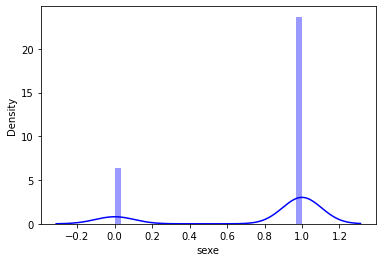

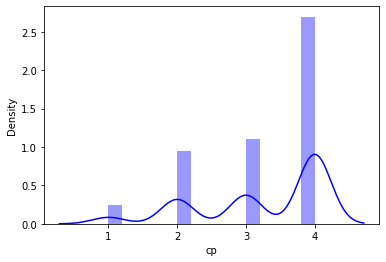

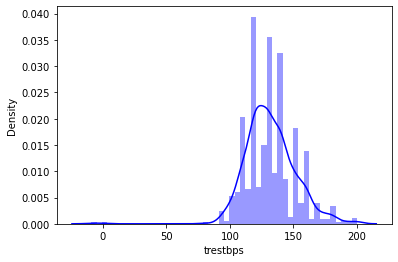

In [146]:
for col in df.select_dtypes("float"):
  plt.figure()
  sns.distplot(df[col],color='blue')




*   trestbps - pression arterielle au repos : [100,200], gaussiène non centrée
*   chol - cholestérol sérique en mg/dl : soit le patient n'en a pas, soit il est compris entre 100 et 400, à voir si pas plus simple de mettre 0(pas de cholestérol) et 1(cholestérol)
*   fbs - glycémie à jeun >120mg/dl vrai ou faux : on remarque un outlier à -9 - confirmé après
*   thalach - fréquence cardiaque maximale atteinte : gaussiène non centrée
*   exang - angine de poitrine induite par l'exercie vrai (1) ou faux(0) : une valeur à -9
*   oldpeack : skewed 
*   ca - nombre de vaisseaux majeurs colorés par flouroscopie(0,1,2,3) - outlier:  1 à 9 et 290 à -9
*   thal 3, 6 ou 7: 266 à -9












In [147]:

print(df["fbs"].value_counts())
print(df["exang"].value_counts())
print(df["ca"].value_counts())
print(df["thal"].value_counts())
print(df["slope"].value_counts())


0.0    524
0      168
1       73
1.0     65
-9       8
Name: fbs, dtype: int64
0.0    408
1.0    188
1      149
0      120
-9       1
Name: exang, dtype: int64
-9     290
0.0    176
1.0     65
2.0     38
3.0     20
2        3
0        3
1        2
0        2
9        1
Name: ca, dtype: int64
-9     266
3.0    166
7.0    117
7       64
3       23
6.0     18
6       18
7       11
6       10
3        7
Name: thal, dtype: int64
2.0    231
-9     190
1.0    154
2      114
1       49
3       41
3.0     22
Name: slope, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

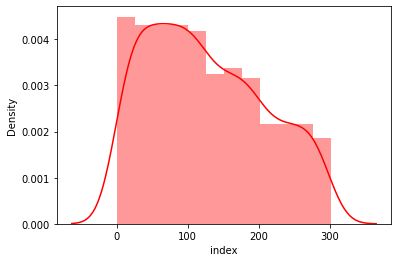

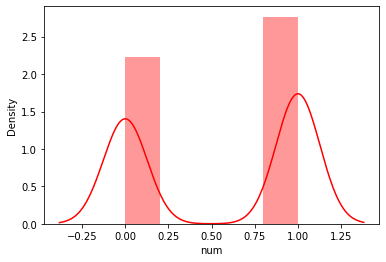

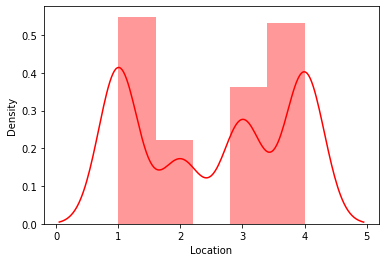

In [148]:
for col in df.select_dtypes("int"):
  plt.figure()
  sns.distplot(df[col],color='red')




*   age : gaussiène : valeurs entre 28 et 78 ans globalement
*   sex - 1 : homme et 0 : femme
*   cp : à voir
*   num : diagnostic de maladie cardiaque - 0 pas malade (<50% du retrecissement du diamètre) 1 malade (>50% du retrecissement du diamètre): binaire - 
*   location : lieu, à voir

In [149]:
#print(df["age"].value_counts().sort_values())
print(df["sexe"].value_counts())

1.0    726
0.0    194
Name: sexe, dtype: int64


Variables qualitatives (inutile ici)

In [150]:
for col in df.select_dtypes('object'):
  print(f'{col:-<50}{df[col].unique()}')

chol----------------------------------------------[233.0 286.0 229.0 250.0 204.0 236.0 268.0 354.0 254.0 203.0 192.0 294.0
 256.0 263.0 199.0 168.0 239.0 275.0 266.0 211.0 283.0 284.0 224.0 206.0
 219.0 340.0 226.0 247.0 167.0 230.0 335.0 234.0 177.0 276.0 353.0 243.0
 225.0 302.0 212.0 330.0 175.0 417.0 197.0 198.0 290.0 253.0 172.0 273.0
 213.0 305.0 216.0 304.0 188.0 282.0 185.0 232.0 326.0 231.0 269.0 267.0
 248.0 360.0 258.0 308.0 245.0 270.0 208.0 264.0 321.0 274.0 325.0 235.0
 257.0 164.0 141.0 252.0 255.0 201.0 222.0 260.0 182.0 303.0 265.0 309.0
 307.0 249.0 186.0 341.0 183.0 407.0 217.0 288.0 220.0 209.0 227.0 261.0
 174.0 281.0 221.0 205.0 240.0 289.0 318.0 298.0 564.0 246.0 322.0 299.0
 300.0 293.0 277.0 214.0 207.0 223.0 160.0 394.0 184.0 315.0 409.0 244.0
 195.0 196.0 126.0 313.0 259.0 200.0 262.0 215.0 228.0 193.0 271.0 210.0
 327.0 149.0 295.0 306.0 178.0 237.0 218.0 242.0 319.0 166.0 180.0 311.0
 278.0 342.0 169.0 187.0 157.0 176.0 241.0 131.0 0 '260' '209' '218' '228'

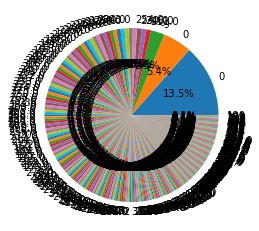

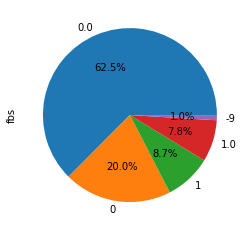

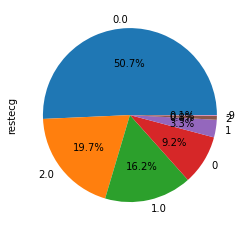

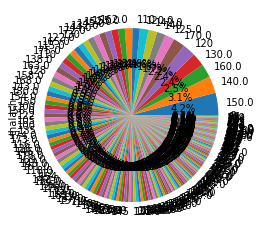

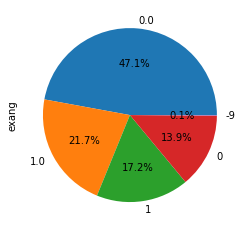

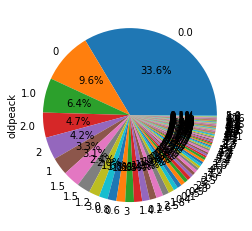

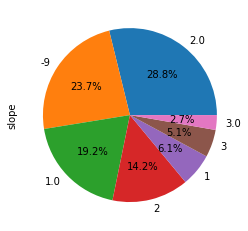

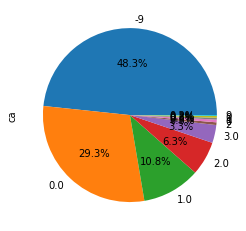

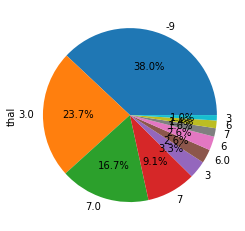

In [151]:
for col in df.select_dtypes('object'):
  plt.figure()
  df[col].value_counts().plot.pie(autopct='%1.1f%%')

**3. Realtions Target/variables**

**Création de sous-ensembles positifs et négatifs**

In [152]:
accident_df=df[df["num"]==1]
healthy_df=df[df["num"]==0]

**Création des ensembles AgeSexeCpNumLocation_columns et ThalachExang_columns**

In [153]:
missing_rate=df.isna().sum()/df.shape[0]

In [154]:
AgeSexeCpNumLocation_columns=df.columns[missing_rate==0]
print(AgeSexeCpNumLocation_columns)

Index(['index', 'age', 'sexe', 'cp', 'num', 'Location'], dtype='object')


In [155]:
ThalachExang_columns=df.columns[(missing_rate<0.060)& (missing_rate>0.050)]

In [156]:
all_columns=["age","sexe","cp","num","Location","thalach","exang","trestbps","chol","fbs","restecg","oldpeack","slope","ca","thal"]

In [157]:
autres_columns=["trestbps","chol","fbs","restecg","oldpeack","slope","ca","thal"]

**Realtion Target et AgeSexeCpNumLocation_columns**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

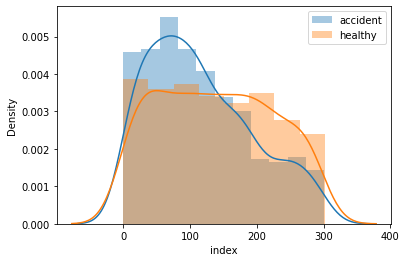

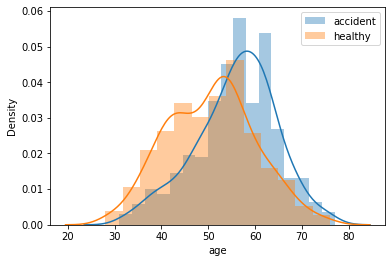

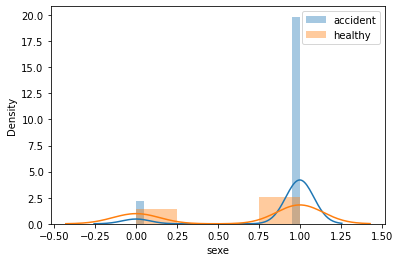

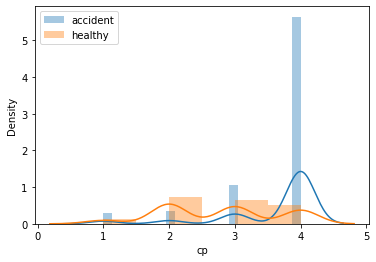

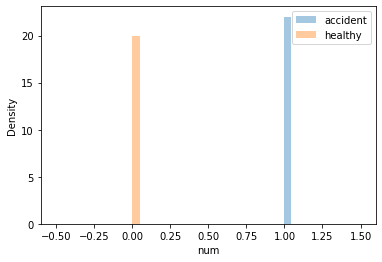

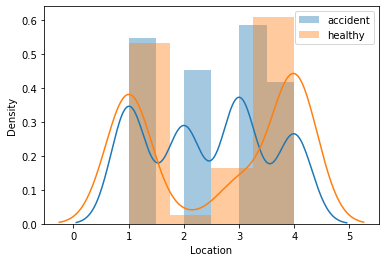

In [158]:
for col in AgeSexeCpNumLocation_columns:
  plt.figure()
  sns.distplot(accident_df[col],label='accident')
  sns.distplot(healthy_df[col],label='healthy')
  plt.legend()




*   age : moyenne des accidents à 60 ans, accidentys très raeres avant 40 ans
*   sexe: bcp plus d'hommes
*   cp : bcp plus d'accidents suite à des douleurs thoraciques asymptomatiques
*   Location : bcp plus de positif en suisse



**Relation target et ThalachExang_columns**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

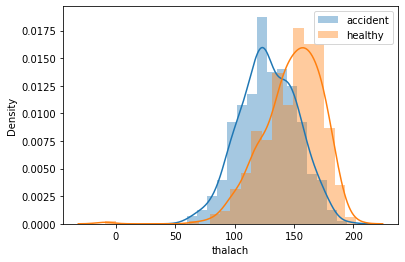

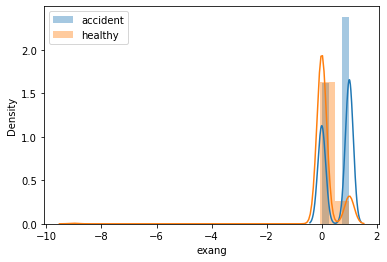

In [159]:
for col in ThalachExang_columns:
  plt.figure()
  sns.distplot(accident_df[col],label='accident')
  sns.distplot(healthy_df[col],label='healthy')
  plt.legend()



*   chol : pas forcément d'incidence, plus d'accidents avec un taux de cholestérol faible dans la proprotion de population
*   thalach, plus d'accidents avec une frq max aux alentours de 120 que une freq max aux alentours de 160
*   exang : bcp plus d'angine suite à des angines induites par l'exercice 





**Relation Target et Age**

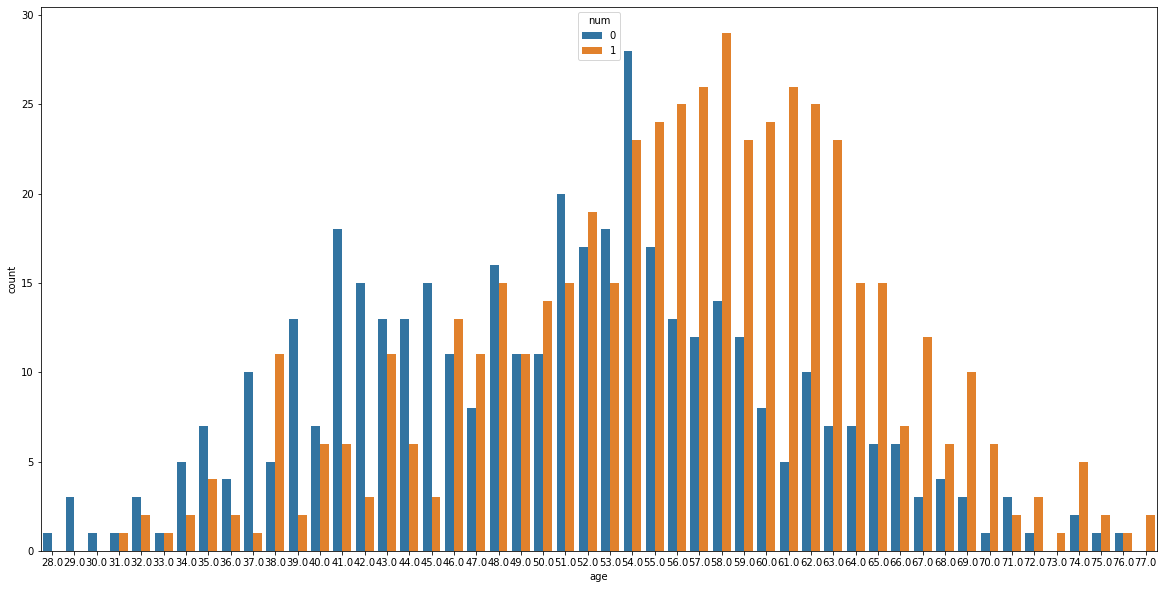

In [160]:
plt.figure(figsize=(20,10))
sns.countplot(x="age",hue="num",data=df)

plus de cas positif que négatif à partir de 52 ans

**Relation target/autres colonnes**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

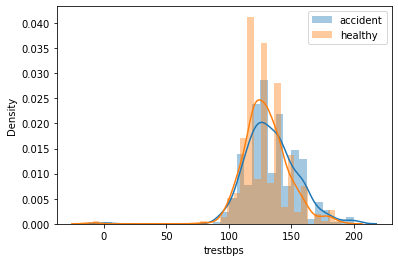

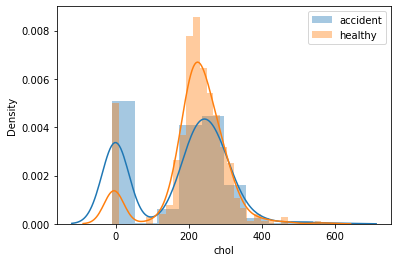

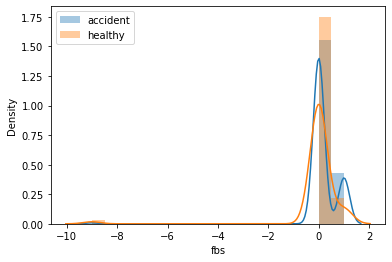

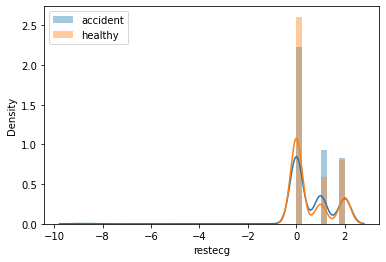

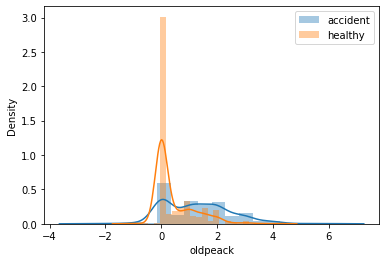

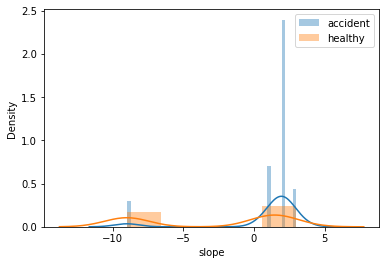

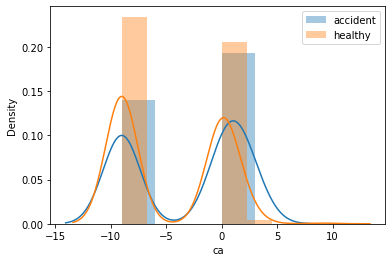

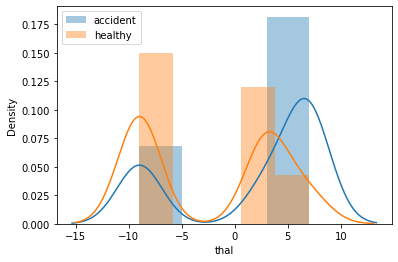

In [161]:
for col in autres_columns:
  plt.figure()
  sns.distplot(accident_df[col],label='accident')
  sns.distplot(healthy_df[col],label='healthy')
  plt.legend()



*   trestbps : une pression arterielle élevée augmente le risque
*   fbs : glycémie à jeun >120 augmente le risque d'accident
*   oldpeack : valeur >0 augmente le risque
*   slope : si ST plat alors augmente le risque





realtion target/ variable qualitative

In [162]:
#pd.crosstab(df["num"],?)

### Analyse plus détaillée
Relation Variables/Variables 




*   global : slope/ca/thal très corrélés : ca thal slope
*   Age : AgeSexeCpNumLocation_columns : très faible corrélation avec*   ca slope thalach thal


NaN analyse : 

*   AgeSexeCpnumLocation : 900/920 55/45
*   ThalachExang : 866/920 : 58/42
















Hypothèse nulle (H0)


*   Les patients ayant eu une atatque sont des hommes de plus de 60 ans ayant eu une douleur thoracique asymptomatique : H0 : la proportion d'hommes et de femmes est égale dans les accidents, la proprotion 
*   Les patients ayants eu une angine induite par l'exercice ont beaucoup plus d'accident



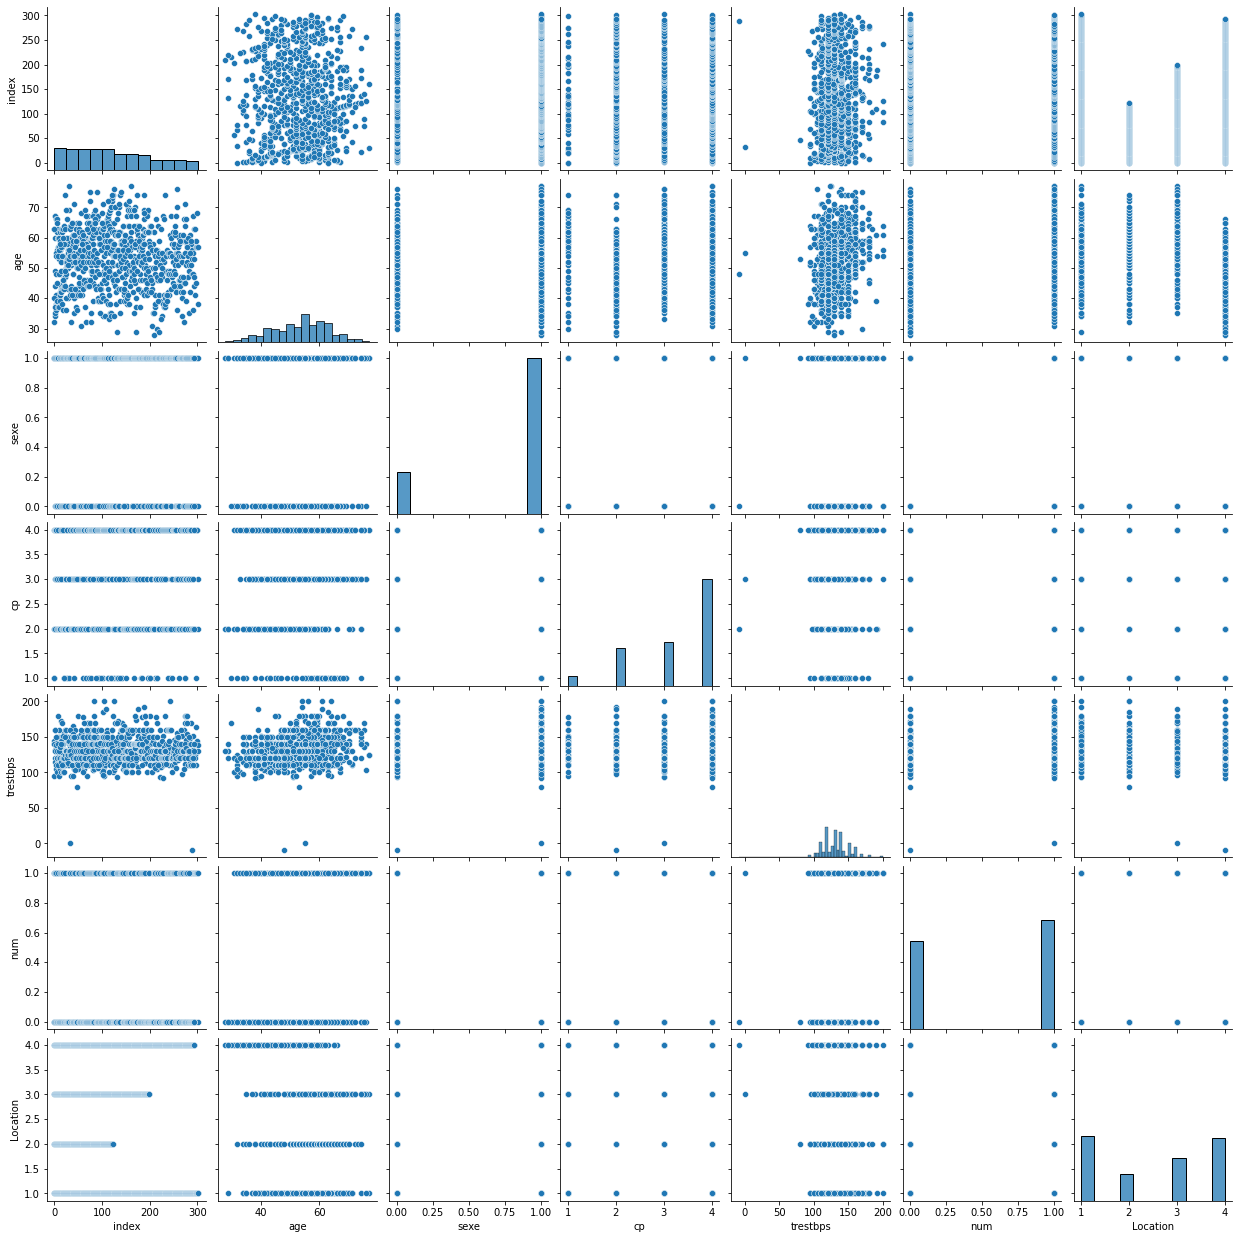

In [163]:
sns.pairplot(df)

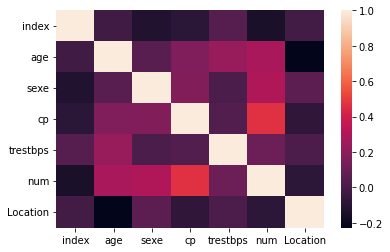

In [164]:
sns.heatmap(df.corr())

forte corrélation slope ca thal

Realtion AgeSexeCpNumLocation_columns

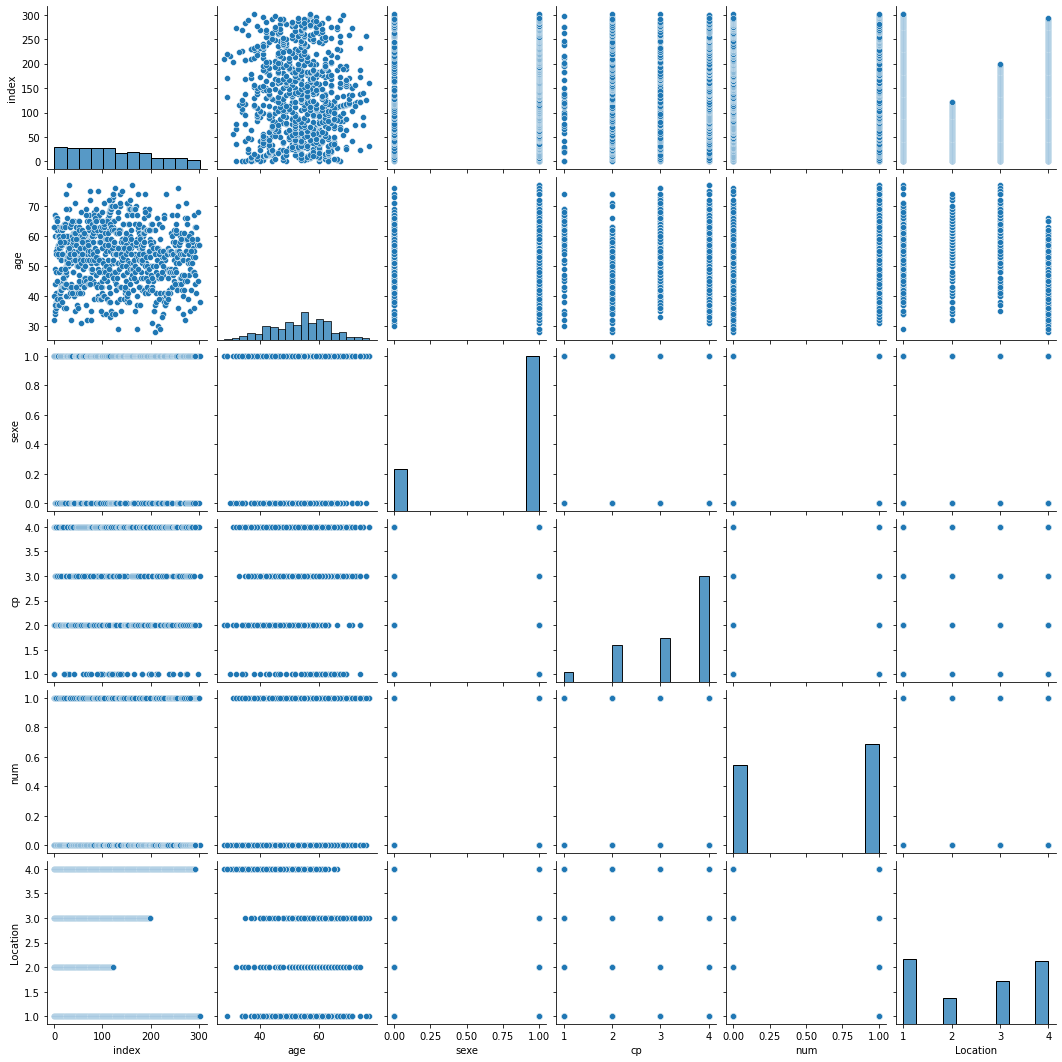

In [165]:
sns.pairplot(df[AgeSexeCpNumLocation_columns])

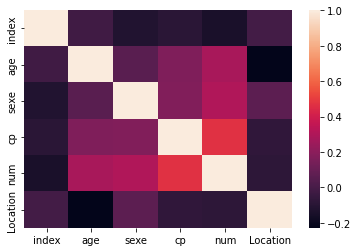

In [166]:
sns.heatmap(df[AgeSexeCpNumLocation_columns].corr())

Realtion ThalachExang_columns

In [167]:
#sns.pairplot(df[ThalachExang_columns])

In [168]:
#sns.heatmap(df[ThalachExang_columns].corr())

rien d'intéressant

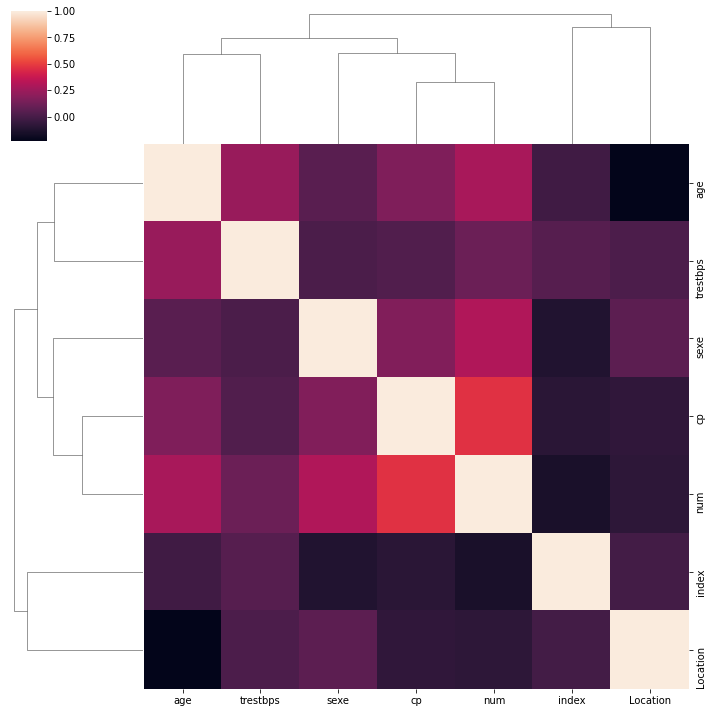

In [169]:
sns.clustermap(df.corr())

slope/ca/thal

**Relation Age/ AgeSexeCpNumLocation_columns**

In [170]:
"""
for col in all_columns:
  plt.figure()
  sns.lmplot(x="age",y=col,hue="num",data=df)"""

'\nfor col in all_columns:\n  plt.figure()\n  sns.lmplot(x="age",y=col,hue="num",data=df)'

In [171]:
df.corr()["age"].sort_values()

Location   -0.227831
index      -0.020778
sexe        0.056889
cp          0.166245
trestbps    0.241348
num         0.282700
age         1.000000
Name: age, dtype: float64

lien faible avec ⁉


*   ca
*   slope
*   thalach
*   thal


NaN analyse

In [172]:
df.dropna().count()

index       592
age         592
sexe        592
cp          592
trestbps    592
chol        592
fbs         592
restecg     592
thalach     592
exang       592
oldpeack    592
slope       592
ca          592
thal        592
num         592
Location    592
dtype: int64

In [173]:
df[AgeSexeCpNumLocation_columns].count()

index       920
age         920
sexe        920
cp          920
num         920
Location    920
dtype: int64

In [174]:
df[ThalachExang_columns].count()

thalach    866
exang      866
dtype: int64

In [175]:
df1=df[AgeSexeCpNumLocation_columns]
df1.dropna()["num"].value_counts(normalize=True)

1    0.553261
0    0.446739
Name: num, dtype: float64

on garde les mêmes proportions

In [176]:
df2=df
df2["num"]=df["num"]
df2.dropna()["num"].value_counts(normalize=True)

0    0.587838
1    0.412162
Name: num, dtype: float64

proportions différentes

Hypotheses nulle (HO)

test d'indépendance de student

In [177]:
from scipy.stats import ttest_ind

In [178]:
accident_df.shape

(509, 16)

In [179]:
healthy_df.shape

(411, 16)

In [180]:
balance_accident_df=accident_df.sample(healthy_df.shape[0])

In [181]:
def t_test(col):
  alpha=0.02
  stat,p=ttest_ind(balance_accident_df[col].dropna(),healthy_df[col].dropna())
  if p<alpha:
    return "H0 rejetée"
  else :
    return 0

In [182]:
test1=["age","cp"]

In [183]:
for col in test1:
  print(f'{col:-<50}{t_test(col)}')

age-----------------------------------------------H0 rejetée
cp------------------------------------------------H0 rejetée


#2.PRE-PROCESSING

In [184]:
df=data.copy()

In [185]:
#df=df[feat_importance]
importance=["age","sexe","cp","trestbps","chol","thalach","exang","oldpeack","slope","ca","thal","num"]
#df=df[importance]


## TrainTest - Nettoyage - Encodage

In [186]:
from sklearn.model_selection import train_test_split

In [187]:
trainset,testset=train_test_split(df,test_size=0.2,random_state=0)

In [188]:
trainset["num"].value_counts()

1    400
0    336
Name: num, dtype: int64

In [189]:
testset["num"].value_counts()

1    109
0     75
Name: num, dtype: int64

###Encodage

In [190]:
from seaborn.external.husl import xyz_to_rgb
#def encodage

In [191]:
def imputation(df):
  df["is na"]=(df["thalach"].isna())| (df["exang"].isna())
  df=df.fillna(-999)
  df=df.dropna(axis=0)
  return df

In [192]:
def preprocessing(df):
  #df=encodage(df)
  df=imputation(df)
  X=df.drop("num",axis=1)
  y=df["num"]
  print(y.value_counts())
  return X,y

In [193]:
X_train,y_train=preprocessing(trainset)


1    400
0    336
Name: num, dtype: int64


In [194]:
X_test,y_test=preprocessing(testset)

1    109
0     75
Name: num, dtype: int64


###Modélisation

In [195]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.cluster import KMeans,SpectralClustering

In [196]:
preprocessor=make_pipeline(SelectKBest(f_classif,k=10))
model=make_pipeline(PolynomialFeatures(2),SelectKBest(f_classif,k=10),RandomForestClassifier(random_state=0))
#model=make_pipeline(RandomForestClassifier(random_state=0))

In [197]:
from pandas.core.common import random_state
RandomForest=make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaBoost=make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVM=make_pipeline(preprocessor,StandardScaler(),SVC(random_state=0))
KNN=KNeighborsClassifier()
#SVM=make_pipeline(preprocessor,StandardScaler(),SV())
#NB=make_pipeline(preprocessor,StandardScaler(),GaussianNB())
#Kmeans=make_pipeline(preprocessor,KMeans(n_clusters=4,random_state=0))
#Spectral=make_pipeline(preprocessor,SpectralClustering(n_clusters=4,random_state=0))

In [198]:
dict_of_models={'RandomForest':RandomForest,
                'AdaBoost':AdaBoost,
                'SVM':SVM,
                'KNN':KNN,
                "NB":NB,
                #'KMeans':Kmeans,
                #'Spectral':Spectral
                }

In [199]:
def evaluation(model):
  model.fit(X_train,y_train)
  ypred=model.predict(X_test)

  print(confusion_matrix(y_test,ypred))
  print(classification_report(y_test,ypred))

  N,train_score,val_score=learning_curve(model,X_train,y_train,cv=4,scoring="f1",train_sizes=np.linspace(0.1,1,10))

  plt.figure(figsize=(12,8))
  plt.plot(N,train_score.mean(axis=1),label="train score")
  plt.plot(N,val_score.mean(axis=1),label="validation score")
  plt.legend()

RandomForest
[[61 14]
 [16 93]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        75
           1       0.87      0.85      0.86       109

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local

AdaBoost
[[58 17]
 [18 91]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77        75
           1       0.84      0.83      0.84       109

    accuracy                           0.81       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.81      0.81       184



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local

SVM
[[58 17]
 [18 91]]
              precision    recall  f1-score   support

           0       0.76      0.77      0.77        75
           1       0.84      0.83      0.84       109

    accuracy                           0.81       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.81      0.81      0.81       184



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local

KNN
[[46 29]
 [26 83]]
              precision    recall  f1-score   support

           0       0.64      0.61      0.63        75
           1       0.74      0.76      0.75       109

    accuracy                           0.70       184
   macro avg       0.69      0.69      0.69       184
weighted avg       0.70      0.70      0.70       184

NB
[[64 11]
 [58 51]]
              precision    recall  f1-score   support

           0       0.52      0.85      0.65        75
           1       0.82      0.47      0.60       109

    accuracy                           0.62       184
   macro avg       0.67      0.66      0.62       184
weighted avg       0.70      0.62      0.62       184



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local

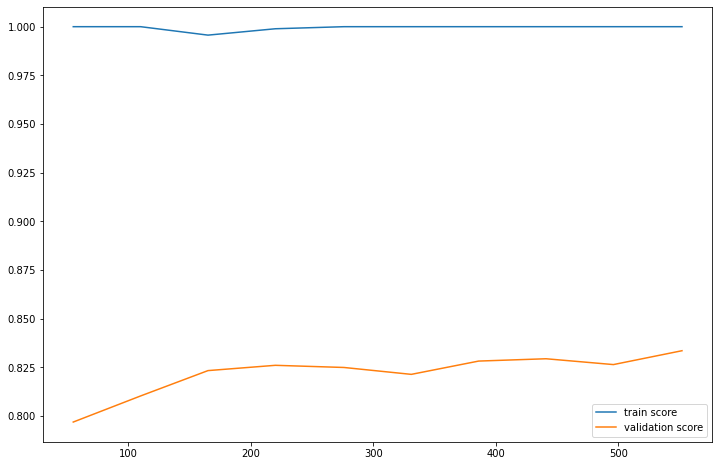

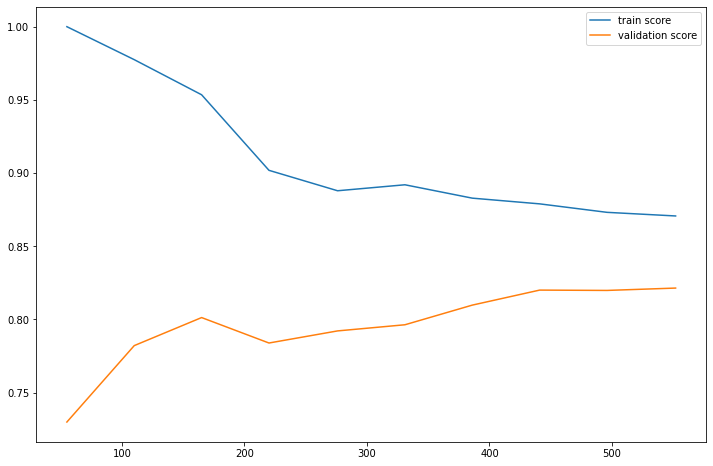

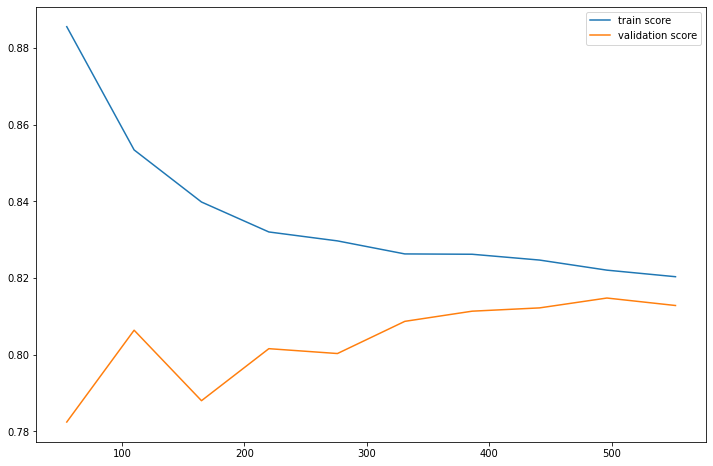

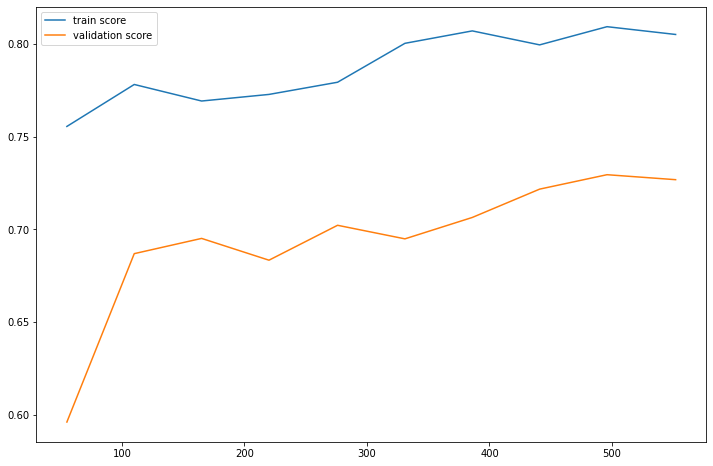

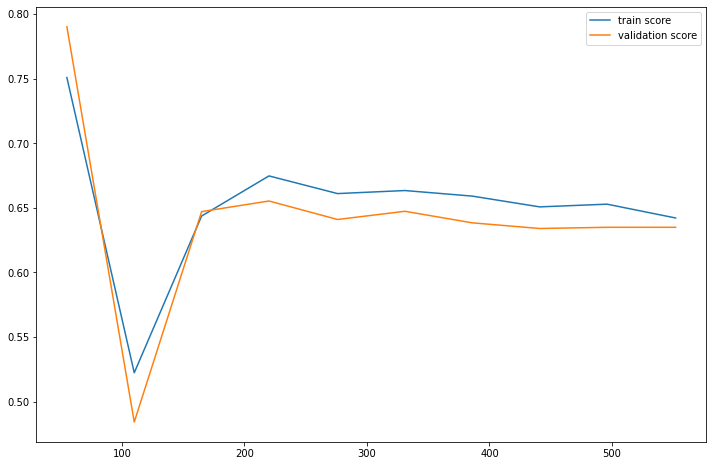

In [200]:
for name,model in dict_of_models.items():
  print(name)
  evaluation(model)

Adaboost semble plus prométeur

Procédure d'évaluation

In [201]:
from sklearn.metrics import f1_score,recall_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve

In [202]:
def evaluation(model):
  model.fit(X_train,y_train)
  ypred=model.predict(X_test)

  print(confusion_matrix(y_test,ypred))
  print(classification_report(y_test,ypred))

  N,train_score,val_score=learning_curve(model,X_train,y_train,cv=4,scoring="f1",train_sizes=np.linspace(0.1,1,10))

  plt.figure(figsize=(12,8))
  plt.plot(N,train_score.mean(axis=1),label="train score")
  plt.plot(N,val_score.mean(axis=1),label="validation score")
  plt.legend()


correctement diagnostiqué 46 personnes, mais incorrectement 11

on voit que l'on est légérement en overfitting

In [203]:
#pd.DataFrame(model.feature_importances_,index=X_train.columns).plot.bar(figsize=(20,10))

In [204]:
#importance=["age","sexe","cp","trestbps","chol","thalach","exang","oldpeack","slope","ca","thal"]

In [205]:
#df[importance]

# 3. OPTIMISATION

In [206]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [221]:
RandomForest.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'randomforestclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__selectkbest', 'pipeline__selectkbest__k', 'pipeline__selectkbest__score_func', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_start'])

In [222]:
hyper_params={"randomforestclassifier__n_estimators":[200,500,1000,2000],
              "randomforestclassifier__max_depth":[10,50,100],
              }

In [224]:
grid=RandomizedSearchCV(RandomForest,hyper_params,scoring="f1",cv=4,n_iter=40)

grid.fit(X_train,y_train)

print(grid.best_params_)

y_pred=grid.predict(X_test)
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 12 is smaller than n_iter=40. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


{'randomforestclassifier__n_estimators': 2000, 'randomforestclassifier__max_depth': 10}
              precision    recall  f1-score   support

           0       0.80      0.81      0.81        75
           1       0.87      0.86      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



[[57 18]
 [14 95]]
              precision    recall  f1-score   support

           0       0.80      0.76      0.78        75
           1       0.84      0.87      0.86       109

    accuracy                           0.83       184
   macro avg       0.82      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [14] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local

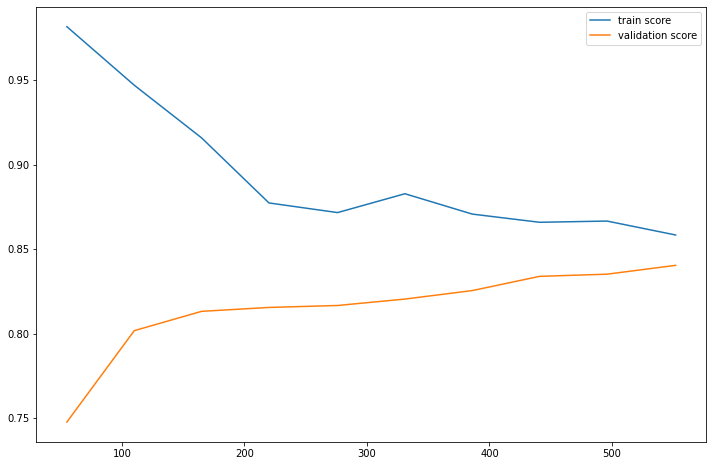

In [213]:
evaluation(grid.best_estimator_)

## Precision Recall Curve

In [214]:
from sklearn.metrics import precision_recall_curve

In [215]:
precision,recall,threshold=precision_recall_curve(y_test,grid.best_estimator_.decision_function(X_test))

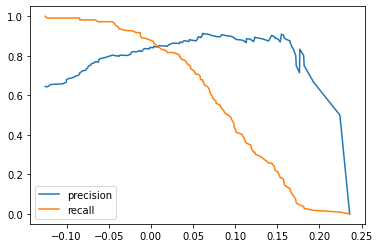

In [216]:
plt.plot(threshold,precision[:-1],label="precision")
plt.plot(threshold,recall[:-1],label="recall")
plt.legend()

In [217]:
def model_final(model,X,threshold=0):
    return model.decision_function(X)>threshold

In [218]:
y_pred=model_final(grid.best_estimator_,X_test,threshold=-0.05)

In [219]:
f1_score(y_test,y_pred)

0.8760330578512396

In [220]:
recall_score(y_test,y_pred)

0.9724770642201835